## Problem Statement

1. Finding similar type of email
2. Clustering the email subject
3. Identify if same cluster contains both responsive and not-responsive documents

If same cluster contains both responsive and not-responsive documents then **Consistency Index** column will be **"Y"**

Please refer the below image to understand the problem statement correctly

# Data

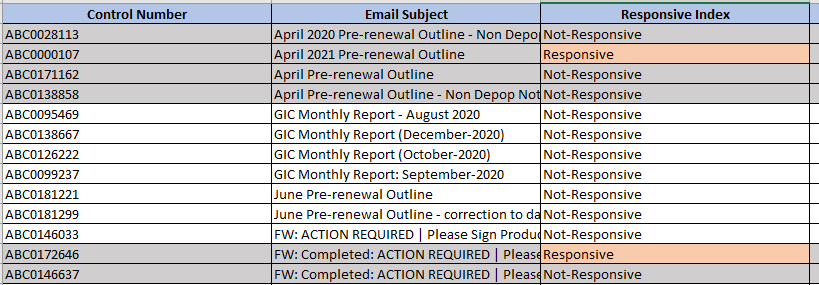

# Desired Output

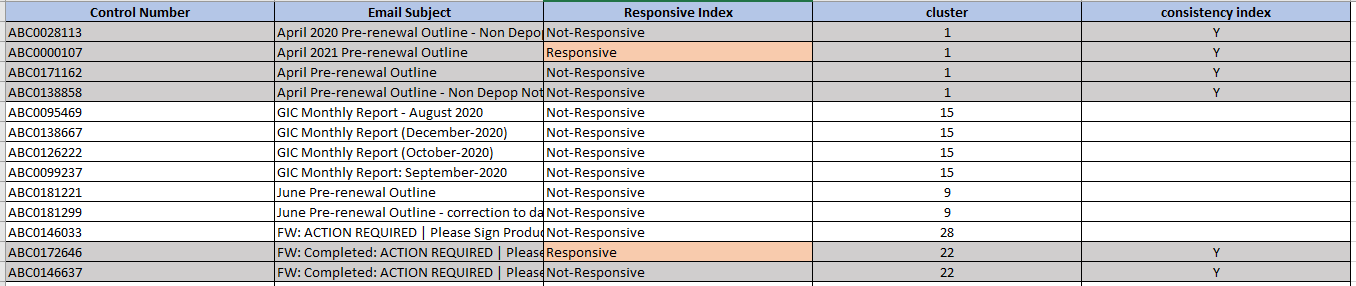

## How this algo works?

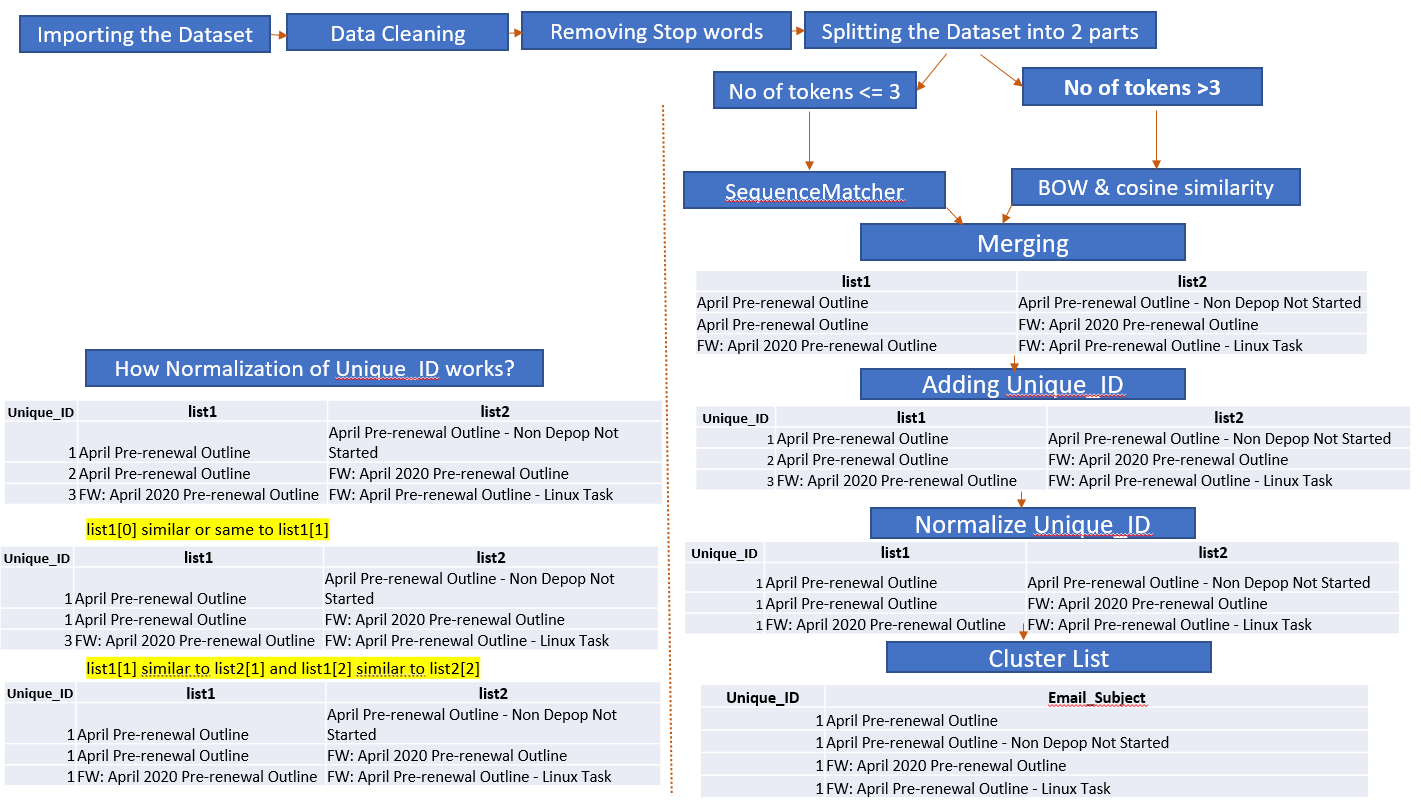

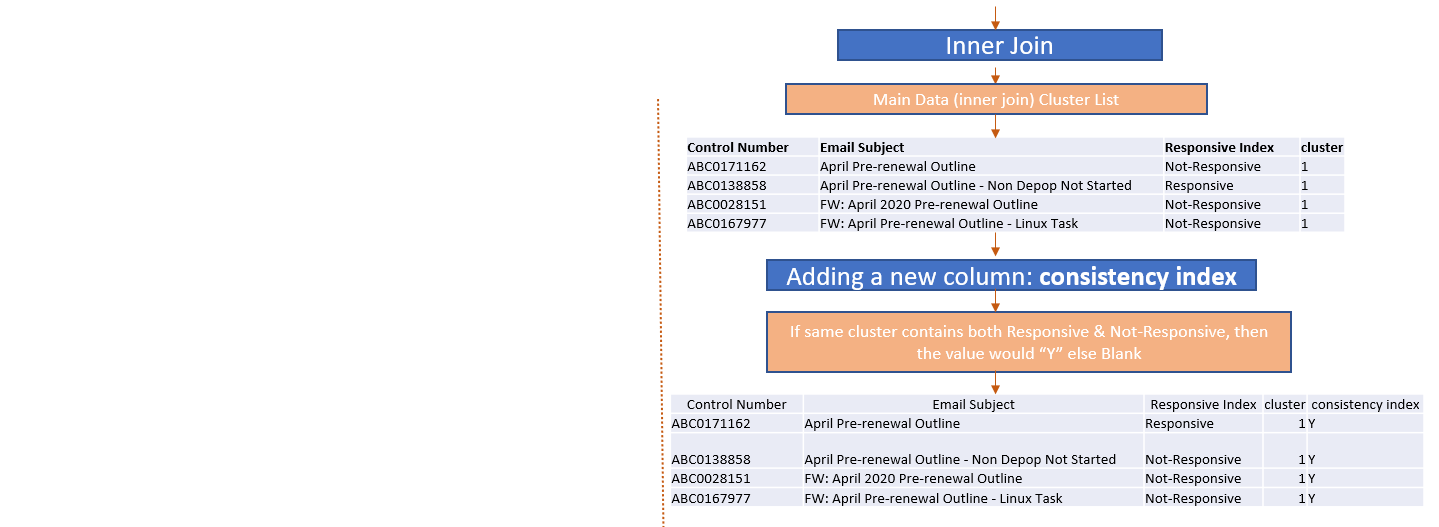

Data: https://github.com/SuryaSD/Clustering_of_Email_Subject/blob/main/email.xlsx

## Importing the file and removing the NA value

In [275]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df= pd.read_excel(r'C:\Users\surya\Desktop\geeksforgeeks\email_clustering\email.xlsx','main')
corpus = list(set(df["Email Subject"].values))
corpus2 = list(set(df["Email Subject"].values))

corpus = list(filter(lambda x: str(x) != 'nan', corpus))
corpus2 = list(filter(lambda x: str(x) != 'nan', corpus2))


## Data Cleaning - removing the punctuation and number value. Removing the stop words. replacing some keywords

In [276]:
import re
new_corpus2 = []
corpus_backup =[]
for i in range (len(corpus)):
    try:
        review = re.sub("&" , "and" , corpus[i])
        review = re.sub('[^a-zA-Z]',' ',review)
        review = review.lower()
        new_corpus2.append(review)
        corpus_backup.append(corpus[i])
    except:
        new_corpus2.append(review)
        corpus_backup.append(corpus[i])

from nltk.tokenize import word_tokenize 
new_corpus = []
my_stop_words = ['an','the','fw','fwd','re','automated','reply','forward','to','cc','bcc',
                 'i','ii','iii','iv','v','vi','vii','viii','ix'
                     'x','xi','xii','xiii','xiv','xv']
for i in range (len(new_corpus2)):
      review = new_corpus2[i]
      review = [w for w in word_tokenize(review)  if not w in my_stop_words]
      review = ' '.join(review)
      review = re.sub(' +', ' ', review)
      review = re.sub("ttee" , "trust" , review)
      review = re.sub("tru" , "trust" , review)
      review = re.sub("&" , "and" , review)
      review = re.sub("irre" , "irrevocable" , review)
      review = re.sub("investments" , "investment" , review)
      review = re.sub("comp" , "company" , review)
      review = re.sub(' +', ' ', review)
      review = review.strip()
      new_corpus.append(review)


## Splitting the Dataset into two parts on basis of tokens

In [277]:
corpus_p1 = []
corpus_p2 = []
corpus_p1_m = []
corpus_p2_m = []

for i in range (len(new_corpus)):
    if len(new_corpus[i].split(' '))>3:
        corpus_p1.append(new_corpus[i])
        corpus_p1_m.append(corpus_backup[i])
    else:
        corpus_p2.append(new_corpus[i])
        corpus_p2_m.append(corpus_backup[i])

## Running BOW algo for the first list

In [278]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_p1)
list1_1 = []
list1_2 = []
threshold = 0.7
for x in range(0,X.shape[0]):
  for y in range(x,X.shape[0]):
    if(x!=y):
      if(cosine_similarity(X[x],X[y])>threshold) and (corpus_p1_m[x] != corpus_p1_m[y] and corpus_p1[x][1]==corpus_p1[y][1]):
        #print((corpus[x],' | | ',corpus[y])) 
        list1_1.append(corpus_p1_m[x])
        list1_2.append(corpus_p1_m[y])

In [279]:
for i in range (len(list1_1)):
    print(list1_1[i],' ', list1_2[i])

Fwd: Time Sensitive: Project_Name Hill Ins. - Martha Bills - INC-2020-000456   FW: Time Sensitive: Project_Name Hill Ins. - Armando Suarez - INC-2020-001228
April Pre-renewal Outline - Non Depop Not Started   April Pre-renewal Outline
April Pre-renewal Outline - Non Depop Not Started   April 2020 Pre-renewal Outline - Non Depop
April Pre-renewal Outline - Non Depop Not Started   April 2021 Pre-renewal Outline
April Pre-renewal Outline - Non Depop Not Started   FW: April 2020 Pre-renewal Outline
PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20   PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/16/20
PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20   PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 3/3/20 ***DOC ONLY***
PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20   FW: PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 6/1/20 ***DB ONLY*** 
PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20   FW: PAT

## Running sequencematcher in second list

In [280]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

#print(similar("Apple","Apple M"))

list2_1 = []
list2_2 = []

for x in range(0,len(corpus_p2)):
  for y in range(x,len(corpus_p2)):
    if(x!=y):
      if((similar(corpus_p2[x],corpus_p2[y])>.70)):
        print((corpus_p2_m[x],' | | ',corpus_p2_m[y])) 
        list2_1.append(corpus_p2_m[x])
        list2_2.append(corpus_p2_m[y])

('RE: 2:00 weather update', ' | | ', '2:00 weather update')
('Finances', ' | | ', 'FW: Finances')
('Payment Method', ' | | ', 'FW: Payment Method')
('RE: ALI upgrade', ' | | ', 'ALI upgrade')


## Merging two list

In [281]:
list1 = list1_1 + list2_1
list2 = list1_2 + list2_2

## Adding the Unique_ID

In [282]:
unique_id = []
for i in range (len(list1)):
    unique_id.append(i)

In [283]:
for i in range (len(list1)):
    print(unique_id[i],'|',list1[i],'|', list2[i])

0 | Fwd: Time Sensitive: Project_Name Hill Ins. - Martha Bills - INC-2020-000456 | FW: Time Sensitive: Project_Name Hill Ins. - Armando Suarez - INC-2020-001228
1 | April Pre-renewal Outline - Non Depop Not Started | April Pre-renewal Outline
2 | April Pre-renewal Outline - Non Depop Not Started | April 2020 Pre-renewal Outline - Non Depop
3 | April Pre-renewal Outline - Non Depop Not Started | April 2021 Pre-renewal Outline
4 | April Pre-renewal Outline - Non Depop Not Started | FW: April 2020 Pre-renewal Outline
5 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/16/20
6 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 3/3/20 ***DOC ONLY***
7 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20 | FW: PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 6/1/20 ***DB ONLY*** 
8 | PATCH/INTERIM RELEASE NOTIFICATION: (T

## Normalization of Unique_ID

In [287]:
for i in range (0,len(list1)):
    for j in range (i+1,len(list1)):
        if list1[j] == list1[i]:
            if (unique_id[j]>unique_id[i]):
              unique_id[j]=unique_id[i]
            else:
                unique_id[i]=unique_id[j]

for i in range (0,len(list1)):
    for j in range (i+1,len(list1)):
        if list2[j] == list2[i]:
            if (unique_id[j]>unique_id[i]):
              unique_id[j]=unique_id[i]
            else:
                unique_id[i]=unique_id[j]
                
                
for i in range (0,len(list1)):
    for j in range (len(list1)):
        if list1[j] == list2[i]:
            if (unique_id[j]>unique_id[i]):
              unique_id[j]=unique_id[i]
            else:
                unique_id[i]=unique_id[j]
                
                
for i in range (len(list1)):
    for j in range (len(list1)):
        if list2[j] == list1[i]:
            if (unique_id[j]>unique_id[i]):
              unique_id[j]=unique_id[i]
            else:
                unique_id[i]=unique_id[j]                

## After Normalization of Unique_ID

In [288]:
for i in range (len(list1)):
    print(unique_id[i],'|',list1[i],'|', list2[i])

0 | Fwd: Time Sensitive: Project_Name Hill Ins. - Martha Bills - INC-2020-000456 | FW: Time Sensitive: Project_Name Hill Ins. - Armando Suarez - INC-2020-001228
1 | April Pre-renewal Outline - Non Depop Not Started | April Pre-renewal Outline
1 | April Pre-renewal Outline - Non Depop Not Started | April 2020 Pre-renewal Outline - Non Depop
1 | April Pre-renewal Outline - Non Depop Not Started | April 2021 Pre-renewal Outline
1 | April Pre-renewal Outline - Non Depop Not Started | FW: April 2020 Pre-renewal Outline
5 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/16/20
5 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 3/3/20 ***DOC ONLY***
5 | PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 10/15/20 | FW: PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL SUPPORT) 6/1/20 ***DB ONLY*** 
5 | PATCH/INTERIM RELEASE NOTIFICATION: (T

## Creating the cluster data frame

In [289]:
unique_c = list(set(unique_id))
unique_c
all_cluster = []
for i in range (len(unique_c)):
    cluster = []
    for j in range (len(list1)):
        if unique_c[i] == unique_id[j]:
            cluster.append(list1[j])
            cluster.append(list2[j])
    all_cluster.append(list(set(cluster)))
all_cluster  

df_final=pd.DataFrame(all_cluster[0])
df_final=pd.DataFrame(all_cluster[0])
for i in range(len(all_cluster)-1):
    df_final=pd.concat([df_final,pd.DataFrame(all_cluster[i+1])])
df_final

df_final = df_final.rename(columns = {0:'Email Subject'})
df_final

        
control_len=[]
for i in range (len(unique_c)):
    for j in range (len(all_cluster[i])):
        control_len.append(unique_c[i])
df_final['cluster']=control_len


In [290]:
df_final.head(50)

,Email Subject,cluster
0,Fwd: Time Sensitive: Project_Name Hill Ins. - ...,0
1,FW: Time Sensitive: Project_Name Hill Ins. - A...,0
0,FW: April 2020 Pre-renewal Outline,1
1,April Pre-renewal Outline - Non Depop Not Started,1
2,April Pre-renewal Outline,1
3,April 2021 Pre-renewal Outline,1
4,FW: April Pre-renewal Outline - Linux Task,1
5,April 2020 Pre-renewal Outline - Non Depop,1
0,FW: PATCH/INTERIM RELEASE NOTIFICATION: (TECHN...,5
1,PATCH/INTERIM RELEASE NOTIFICATION: (TECHNICAL...,5


## Inner Join of source dataframe and cluster dataframe

In [291]:
final_df = pd.merge(df, 
                      df_final, 
                      on ='Email Subject', 
                      how ='inner')
final_df

,Control Number,Email Subject,Responsive Index,cluster
0,ABC0028113,April 2020 Pre-renewal Outline - Non Depop,Not-Responsive,1
1,ABC0000107,April 2021 Pre-renewal Outline,Responsive,1
2,ABC0171162,April Pre-renewal Outline,Not-Responsive,1
3,ABC0138858,April Pre-renewal Outline - Non Depop Not Started,Not-Responsive,1
4,ABC0095469,GIC Monthly Report - August 2020,Not-Responsive,15
...,...,...,...,...
66,ABC0092573,RE: 2:00 weather update,Not-Responsive,61
67,ABC0092549,RE: 2:00 weather update,Not-Responsive,61
68,ABC0123295,ALI upgrade,Not-Responsive,64
69,ABC0123307,RE: ALI upgrade,Not-Responsive,64


In [146]:
#final_df.to_excel(r'C:\Users\surya\Desktop\geeksforgeeks\email_clustering\output2.xlsx')

In [292]:
u_id = list(set(final_df['cluster']))
final_df['consistency index'] = ''
insc = []

for i in range (len(u_id)):

    df_filtered=final_df[final_df['cluster'] == u_id[i]]
    if len(set(df_filtered['Responsive Index']))>1:
       insc.append(u_id[i])
    
for i in range (len(df_final)):
    if final_df['cluster'][i] in insc:
        final_df['consistency index'][i] = 'Y'

<ipython-input-292-390d55af952c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['consistency index'][i] = 'Y'


In [294]:
final_df.sort_values(by='cluster')

,Control Number,Email Subject,Responsive Index,cluster,consistency index
35,ABC0077213,FW: Time Sensitive: Project_Name Hill Ins. - A...,Not-Responsive,0,
37,ABC0137856,Fwd: Time Sensitive: Project_Name Hill Ins. - ...,Not-Responsive,0,
36,ABC0037329,Fwd: Time Sensitive: Project_Name Hill Ins. - ...,Not-Responsive,0,
34,ABC0078253,FW: Time Sensitive: Project_Name Hill Ins. - A...,Not-Responsive,0,
39,ABC0167977,FW: April Pre-renewal Outline - Linux Task,Not-Responsive,1,Y
...,...,...,...,...,...
62,ABC0051335,FW: Payment Method,Not-Responsive,63,
63,ABC0140600,Payment Method,Not-Responsive,63,
69,ABC0123307,RE: ALI upgrade,Not-Responsive,64,
68,ABC0123295,ALI upgrade,Not-Responsive,64,


In [295]:
final_df.to_excel(r'C:\Users\surya\Desktop\geeksforgeeks\email_clustering\ouput.xlsx',index = False)

Output Data: https://github.com/SuryaSD/Clustering_of_Email_Subject/blob/main/ouput.xlsx